## Normalizing data
With SKLearn StandardScaler and Scipy.Stats z-score.  
Also manually with S. Raschka examples. 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

### Pandas and Basic Stats

In [4]:
#create a df
d = {'col_a':[0,1,2,3,4], 'col_b':[1,2,3,4,5]}
df_2norm = pd.DataFrame(data=d)
print(df_2norm)
print (df_2norm.describe())


   col_a  col_b
0      0      1
1      1      2
2      2      3
3      3      4
4      4      5
          col_a     col_b
count  5.000000  5.000000
mean   2.000000  3.000000
std    1.581139  1.581139
min    0.000000  1.000000
25%    1.000000  2.000000
50%    2.000000  3.000000
75%    3.000000  4.000000
max    4.000000  5.000000


#### Note: Normalized by N-1 by default

In [57]:
#confirm stddev 
print (df_2norm['col_b'].std())

#confirm manually
n= len(df_2norm['col_b'])
mean = df_2norm['col_b'].mean()
sum_of_sqr_diff = sum((df_2norm['col_b'] - mean)**2)
var = sum_of_sqr_diff / (n-1)
std_dev = var**0.5
print (std_dev)


1.5811388300841898
1.5811388300841898


#### Note: Normalized by N (override default)

In [56]:
df_2norm['col_b'].std(ddof=0)

1.4142135623730951

#### Normalize using SKLearn StandardScaler

In [6]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df_2norm)
df_norm

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

#### Normalize using Scipy.Stats z-score

In [7]:
df_zscored = df_2norm.apply(zscore, axis=0)
df_zscored

,col_a,col_b
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


Conclusion: identical results with 2 diff packages. Matches pandas.series.std normalized by N-1.

### About Feature Scaling and Normalization
refer to http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling  
by Sebastian Raschka (Jul 11, 2014 )

#### Vanilla Python

In [58]:
# Standardization

x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]
print (z_scores)

# Min-Max scaling
minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]

[-1.5811388300841895, 0.07905694150420944, 0.6324555320336758, 1.185854122563142, 1.185854122563142, -1.0277402395547233, -0.4743416490252569]


#### Numpy

In [9]:
import numpy as np

# Standardization

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

print(z_scores_np)

[-1.58113883  0.07905694  0.63245553  1.18585412  1.18585412 -1.02774024
 -0.47434165]


In [10]:
# Min-Max scaling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
#print(np_minmax)

#### Visualize

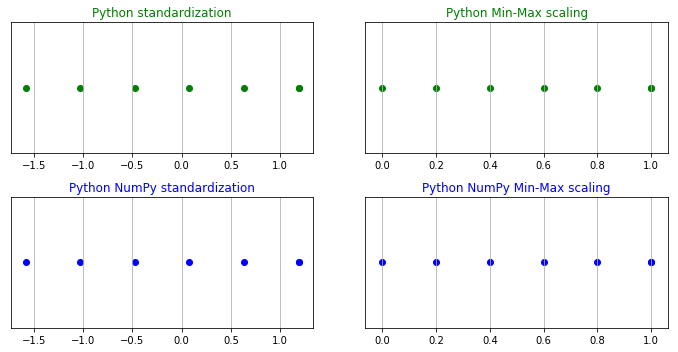

In [11]:
#to validate

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')

plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

#### Apply to my data

In [13]:
x = [1,2,3,4,5]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5
print(mean)
print(std_dev)

#vanilla Py
z_scores = [(x_i - mean)/std_dev for x_i in x]
print(z_scores)

#numpy
x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()
print(z_scores_np)

3.0
1.4142135623730951
[-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
